In [7]:
from skimage import io as skio
#coletando a imagem via url para ter o fundo retirado0000
url = 'http://i.stack.imgur.com/SYxmp.jpg'
img = skio.imread(url)

In [9]:
from skimage import filters
#filtro sobel para calcular o gradiente em cada ponto da imagem
sobel = filters.sobel(img)

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['image.interpolation'] = 'quadric'
plt.rcParams['image.cmap'] = 'bone'
plt.rcParams['figure.dpi'] = 200

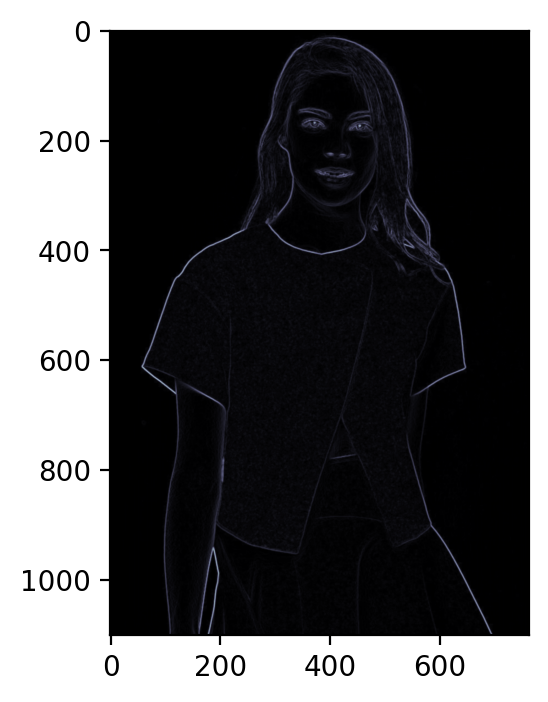

In [11]:
plt.imshow(sobel)

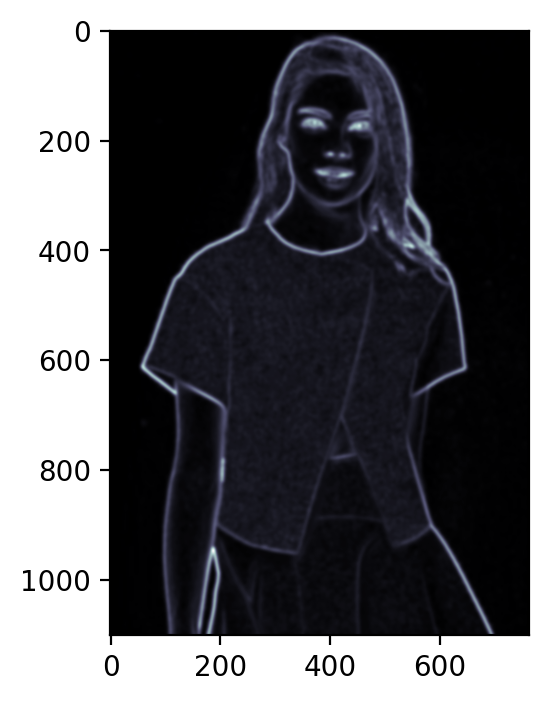

In [12]:
#borrando a imagem para destacar as bordas
imgBorrada = filters.gaussian(sobel, sigma=3.0)
plt.imshow(imgBorrada)

In [58]:
import numpy as np
#identificando os pontos claros da imagem
pontosClaros = np.array((img > 245).nonzero()).T

In [59]:
pontosClaros.shape
print("formato imagem: {}".format(pontosClaros.shape))

formato imagem: (1432, 2)


Text(0.5, 1.0, 'areas claras')

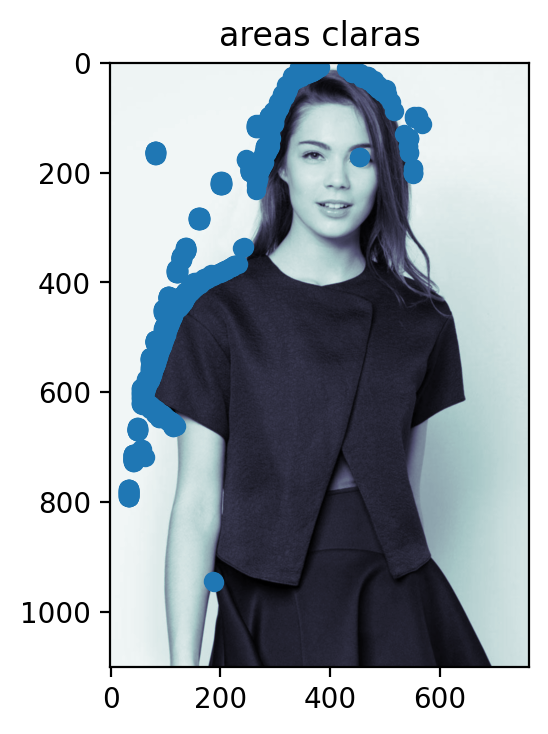

In [60]:
plt.plot(pontosClaros[:, 1], pontosClaros[:, 0], 'o')
plt.imshow(img)
plt.title('areas claras')

In [61]:
#identificando as areas escuras da imagem
pontosEscuros = np.array((img < 3).nonzero()).T;

Text(0.5, 1.0, 'areas escuras')

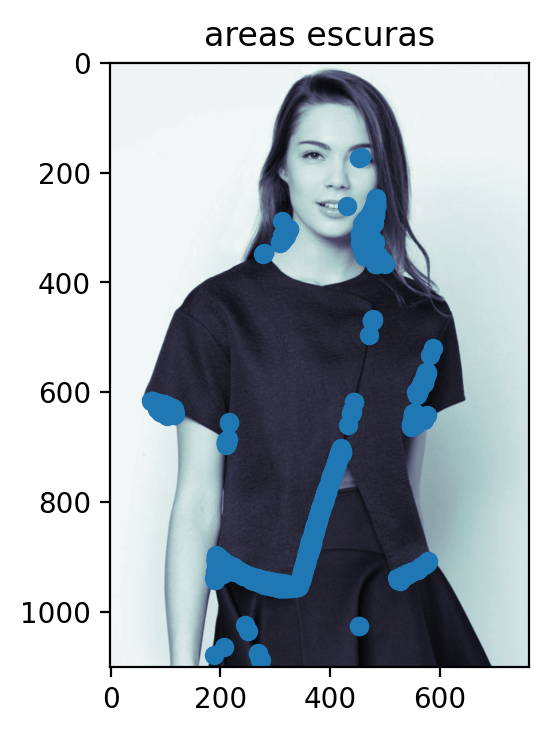

In [62]:
plt.plot(pontosEscuros[:, 1], pontosEscuros[:, 0], 'o')
plt.imshow(img)
plt.title('areas escuras')

In [23]:
from scipy import ndimage as ndi
#utilizando os pontos anteriores para criar uma mascara
bool_mask = np.zeros(img.shape, dtype=np.bool)
bool_mask[tuple(pontosClaros.T)] = True
bool_mask[tuple(pontosEscuros.T)] = True
seed_mask, num_seeds = ndi.label(bool_mask)

<ipython-input-23-1e4001f0a3a9>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bool_mask = np.zeros(img.shape, dtype=np.bool)


c:\users\55359\appdata\local\programs\python\python39\lib\site-packages\skimage\morphology\_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


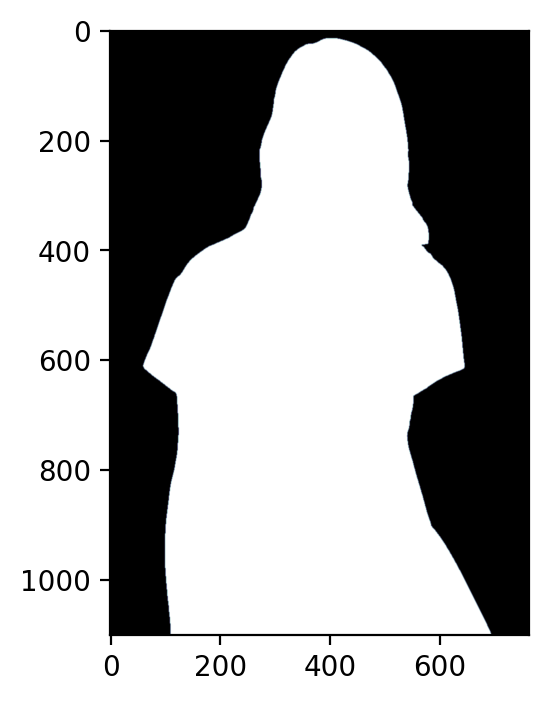

In [64]:
from skimage import morphology
#watershed é utilizado para separar objetos na imagem, no nosso caso, separar o fundo do primeiro plano
ws = morphology.watershed(imgBorrada, seed_mask)
plt.imshow(ws)

In [25]:
fundo = max(set(ws.ravel()), key=lambda g: np.sum(ws == g))

In [26]:
mascaraFundo = (ws == fundo)

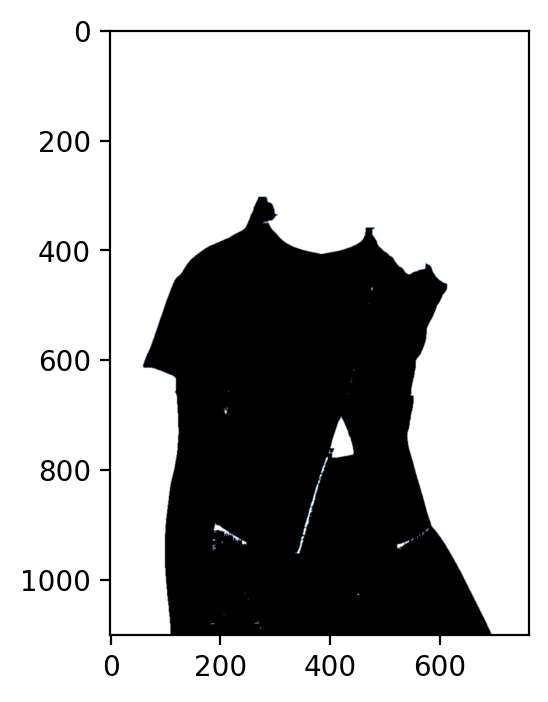

In [27]:
plt.imshow(~mascaraFundo)

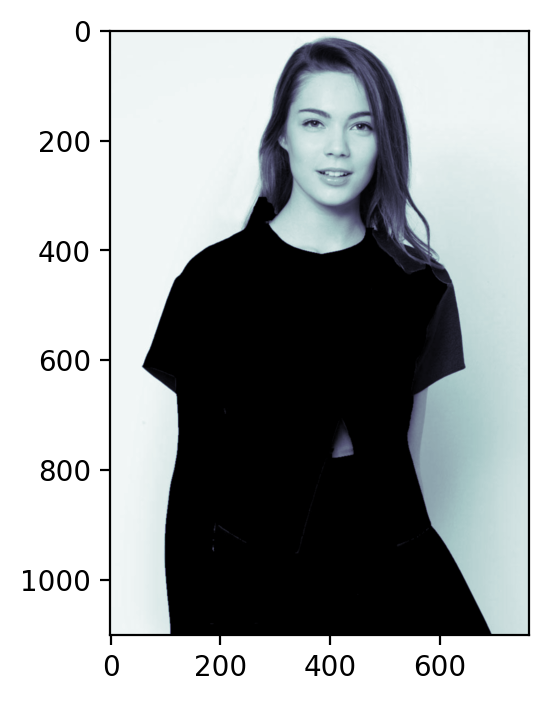

In [66]:
limpa = img * ~mascaraFundo
plt.imshow(limpa, cmap='bone')
plt.imshow(mascaraFundo.reshape(mascaraFundo.shape + (1,)) * np.array([1, 0, 0, 1]))

In [67]:
def funcMask(ax, grupo, result_ws, img_original):
    "função para identificar o background"
    maskBackground = (result_ws == grupo)
    clr = img_original * ~maskBackground
    ax.imshow(clr, cmap='bone')
    ax.imshow(maskBackground.reshape(maskBackground.shape + (1,)) * np.array([1, 0, 0, 1]))

In [53]:
# seed mask para identificar o fundo e o primeiro plano
seed_mask = np.zeros(img.shape, dtype=np.int)
seed_mask[0, 0] = 1 
seed_mask[600, 400] = 2

<ipython-input-53-02bedab4c31a>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  seed_mask = np.zeros(img.shape, dtype=np.int)


c:\users\55359\appdata\local\programs\python\python39\lib\site-packages\skimage\morphology\_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


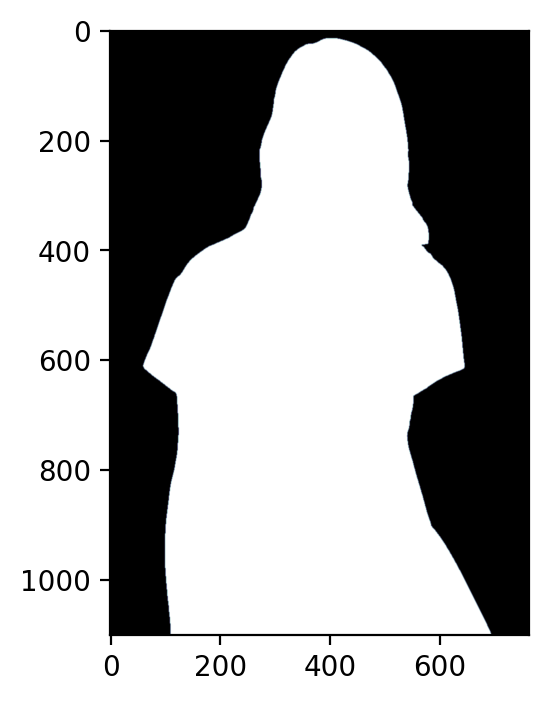

In [54]:
ws = morphology.watershed(imgBorrada, seed_mask)
plt.imshow(ws)

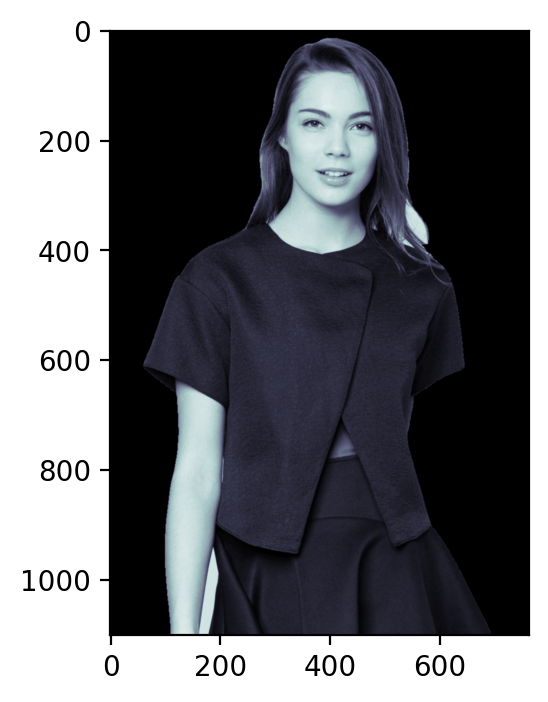

In [56]:
fig, ax = plt.subplots()
funcMask(ax, 1, ws, img)

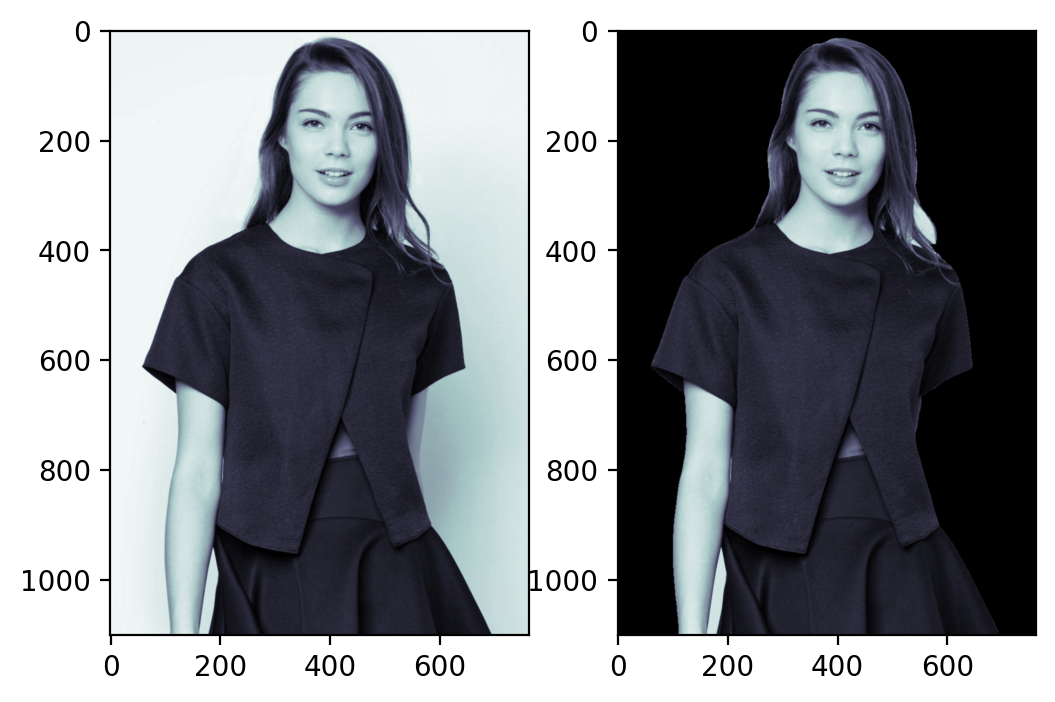

In [57]:
#resultado final, o background foi removido e pode ser alterado 
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img)
funcMask(ax[1], 1, ws, img)